In [133]:
import pandas as pd
import numpy as np
import hvplot.pandas  # noqa
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [134]:
pd.set_option('display.precision', 10)

In [135]:
df = pd.read_csv("../data/week_1/circle_R5/hestersys_research_b5/R.csv", header=None, usecols=[3,4,10], names=['t', 'x', 'y'])
df

,t,x,y
0,-0.0499999970,-0.3999999762,-0.0799999982
1,-0.0499599986,-0.4799999893,-0.0799999982
2,-0.0499199964,-0.4799999893,-0.1599999964
3,-0.0498799980,-0.5600000024,-0.2399999946
4,-0.0498399958,-0.5600000024,-0.2399999946
...,...,...,...
2495,0.0498000011,-0.1599999964,0.4799999893
2496,0.0498399995,-0.1599999964,0.3199999929
2497,0.0498800017,-0.2399999946,0.2399999946
2498,0.0499200001,-0.2399999946,0.1599999964


In [136]:
df.hvplot.scatter(x='x', y='y')

:Scatter   [x]   (y)

In [137]:
# df = df.drop(['tx', 'new_x'], axis = 1)
df.hvplot.scatter(x='t')

:NdOverlay   [Variable]
   :Scatter   [t]   (value)

In [195]:
def harmonic(t, a, w, p):
    return a * np.cos(w * t + p)

def change_phase(df):
    a0 = 3
    w0 =  1.1 * 2*np.pi / 0.015
    p0 = 0

    fit_params_x, covariances_x = curve_fit(harmonic, df['t'], df['x'], p0=[a0, w0, p0])
    fit_params_y, covariances_y = curve_fit(harmonic, df['t'], df['y'], p0=[a0, w0, p0])

    x_fit = harmonic(df['t'], *fit_params_x)
    y_fit = harmonic(df['t'], *fit_params_y)

    f1 =  plt.figure()
    plt.plot(df['t'], x_fit)
    plt.plot(df['t'], df['x'])

    f2 = plt.figure()
    plt.plot(df['t'], y_fit)
    plt.plot(df['t'], df['y'])


    

    df['new_y'] = harmonic(df['t'], fit_params_y[0], fit_params_y[1], fit_params_x[2])
    
    display(df.hvplot.scatter(x='x', y='new_y'))
    return df 

def harmonic_fit(df, a0=3, w0=1.1, p0=0):

    fit_params_x, covariances_x = curve_fit(harmonic, df['t'], df['x'], p0=[a0, w0, p0])
    fit_params_y, covariances_y = curve_fit(harmonic, df['t'], df['y'], p0=[a0, w0, p0])

    x_fit = harmonic(df['t'], *fit_params_x)
    y_fit = harmonic(df['t'], *fit_params_y)

    f1 =  plt.figure()
    plt.plot(df['t'], x_fit)
    plt.plot(df['t'], df['x'])

    f2 = plt.figure()
    plt.plot(df['t'], y_fit)
    plt.plot(df['t'], df['y'])
    return fit_params_x, fit_params_y

# new_df = change_phase(df)

## Phase

In [ ]:
phase_df = pd.read_csv("../data/week_1/circle_R5/zero_state_without_metals_R5.csv", header=None, usecols=[3,4,10], names=['t', 'x', 'y'])
phase_df

,t,x,y
0,-0.02580,-13.200000,-0.528
1,-0.02578,-13.200000,-0.576
2,-0.02576,-13.200000,-0.528
3,-0.02574,-13.200000,-0.560
4,-0.02572,-13.200000,-0.544
...,...,...,...
2495,0.02410,14.000000,0.592
2496,0.02412,14.000000,0.576
2497,0.02414,14.000000,0.576
2498,0.02416,14.400001,0.576


In [178]:
# df['tx'] = df['t']
# df['tx'] += relativ_phase / fit_params[1]

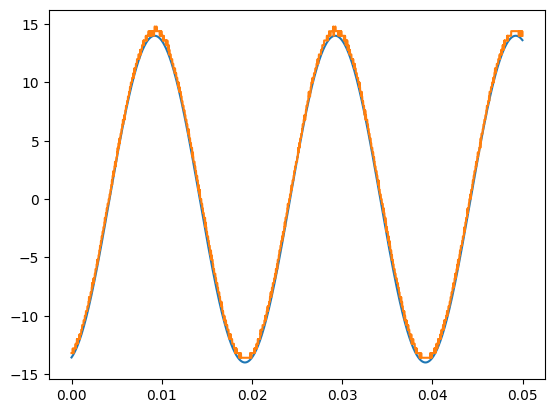

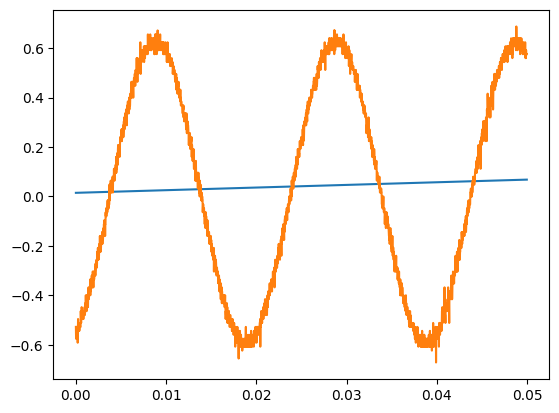

In [196]:
fit_params_x, fit_params_y = harmonic_fit(phase_df, a0=15)

In [177]:
relativ_phase = fit_params[2] - fit_params_y[2]
relativ_phase

-0.12787299718481204

In [175]:

t0 = relativ_phase / fit_params[1]
# t0 = relativ_phase

t = phase_df['t']
print(t0)

difference_array = np.absolute(t-t0)
 
# find the index of minimum element from the array
index = difference_array.argmin()
print(index)

# phase_df['new_x'] = pd.concat([phase_df['x'][:ndex:], phase_df['x'][index:]], axis=0, ignore_index=True)
# phase_df['new_y'] == phase_df['x']

phase_df['new_x'] = phase_df['x'][index:]
phase_df['new_y'] = phase_df['y'][:index]
x = list(phase_df['x'][index:])
y = list(phase_df['y'][:2500 - index])
# phase_df['new_y'] = phase_df['y'][:index]

# phase_df['new_x'] == phase_df['x']
# phase_df['new_y'] == phase_df['x']
len(x), len(y)

-0.00041021488598271704
0


(2500, 2500)

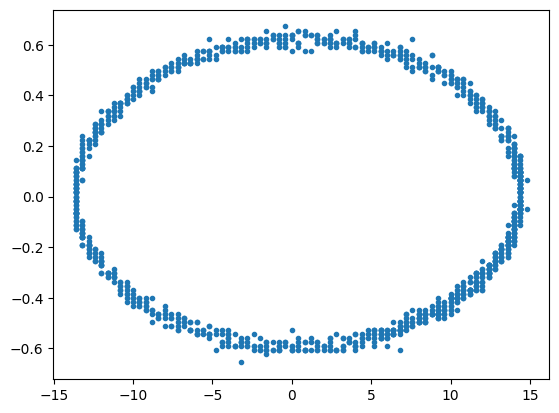

In [170]:
# phase_df
# phase_df.hvplot.scatter(x = 'new_x', y = 'y')
# phase_df.hvplot.scatter(x = 'x', y = 'y')
plt.plot(x, y, '.')

In [75]:
# def new_y(t, a, w, p):
#     return a * np.cos(w * t + p)

phase_df['new_y'] = harmonic(phase_df['t'], fit_params_y[0], fit_params_y[1], fit_params[2])

In [76]:
phase_df.hvplot.scatter(x = 'x', y = 'new_y


:Scatter   [x]   (new_y)